In [1]:
import torch

x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y * y * 3
out = z.mean()
out.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

In [2]:
# -*- coding: utf-8 -*-
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()


0 51125144.0
1 59928544.0
2 64748600.0
3 49714032.0
4 23611104.0
5 8326498.0
6 3517390.0
7 2191487.25
8 1668901.0
9 1355988.125
10 1126495.25
11 946724.625
12 801985.1875
13 684283.0
14 587596.875
15 507428.34375
16 440488.8125
17 384161.4375
18 336540.96875
19 296016.09375
20 261441.5
21 231757.78125
22 206102.5
23 183825.09375
24 164403.109375
25 147413.375
26 132489.484375
27 119355.6171875
28 107777.890625
29 97529.875
30 88424.421875
31 80317.9609375
32 73083.3515625
33 66611.15625
34 60809.3984375
35 55599.46875
36 50908.9140625
37 46677.84375
38 42855.94140625
39 39395.9453125
40 36256.49609375
41 33404.9765625
42 30810.265625
43 28445.85546875
44 26289.359375
45 24318.90625
46 22516.546875
47 20866.27734375
48 19355.6875
49 17969.81640625
50 16696.2421875
51 15524.4462890625
52 14445.6025390625
53 13451.291015625
54 12534.091796875
55 11687.337890625
56 10905.064453125
57 10181.0966796875
58 9511.060546875
59 8890.4814453125
60 8316.087890625
61 7783.10400390625
62 7288.3652343

In [3]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 648.375732421875
1 593.3486938476562
2 546.3768310546875
3 505.7945251464844
4 470.1651916503906
5 438.6766052246094
6 410.1092834472656
7 384.1275939941406
8 360.4639587402344
9 338.6230773925781
10 318.34027099609375
11 299.44189453125
12 281.78741455078125
13 265.1520080566406
14 249.52139282226562
15 234.8289337158203
16 221.0250244140625
17 207.96923828125
18 195.61349487304688
19 183.91159057617188
20 172.83074951171875
21 162.37367248535156
22 152.5302276611328
23 143.24705505371094
24 134.44195556640625
25 126.1460952758789
26 118.33324432373047
27 110.98616790771484
28 104.07931518554688
29 97.60888671875
30 91.52758026123047
31 85.81489562988281
32 80.47791290283203
33 75.4676284790039
34 70.77373504638672
35 66.35245513916016
36 62.208736419677734
37 58.318538665771484
38 54.66971206665039
39 51.23996353149414
40 48.029720306396484
41 45.017818450927734
42 42.19574737548828
43 39.552398681640625
44 37.07732391357422
45 34.75766372680664
46 32.58528137207031
47 30.551700592

375 5.449669333756901e-05
376 5.2770774345844984e-05
377 5.110029815114103e-05
378 4.948389687342569e-05
379 4.791935862158425e-05
380 4.640449697035365e-05
381 4.493688902584836e-05
382 4.351804091129452e-05
383 4.214571163174696e-05
384 4.0817940316628665e-05
385 3.9531565562356263e-05
386 3.82869147870224e-05
387 3.707958967424929e-05
388 3.591357381083071e-05
389 3.4780630812747404e-05
390 3.3685792004689574e-05
391 3.262706013629213e-05
392 3.160020787618123e-05
393 3.060900780837983e-05
394 2.9647912015207112e-05
395 2.871428478101734e-05
396 2.7813413908006623e-05
397 2.6942871045321226e-05
398 2.6094745408045128e-05
399 2.5277795430156402e-05
400 2.448589657433331e-05
401 2.371748814766761e-05
402 2.2975409592618234e-05
403 2.2256936063058674e-05
404 2.1560124878305942e-05
405 2.088635301333852e-05
406 2.0232224414939992e-05
407 1.959916335181333e-05
408 1.8989168893313035e-05
409 1.8397167877992615e-05
410 1.7823906091507524e-05
411 1.726588379824534e-05
412 1.672713551670313e

In [6]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
print(x.shape)

torch.Size([64, 1000])


0.0011276787000750836


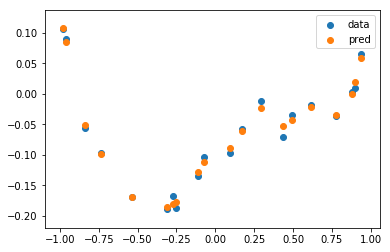

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

data = np.loadtxt('fitting.txt')
torch.set_default_tensor_type(torch.DoubleTensor)
x1 , y1 = data[:,0],data[:,1]
x,y = torch.from_numpy(np.asmatrix(x1).T),torch.from_numpy(np.asmatrix(y1).T)
plt.scatter(x1,y1, label = 'data')
#x, y = x1.double(), y1.double()


N, D_in, H, D_out = len(x), 1, 350, 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 5e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    #print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
print(loss.item())
plt.scatter(x,y_pred.data, label = 'pred')
plt.legend()

# Digit Identification MNIST

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

#Train data.
train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

#Test data.
test= pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(42000, 785)
(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')
print(len(X_train))

X_train = X_train.reshape(X_train.shape[0], 28, 28) #Un arreglo de 42000 imagenes de 28 x 28
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

42000


(28000, 28, 28, 1)

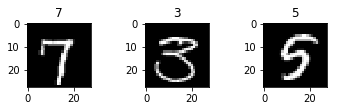

In [12]:
j = 6
for i in range(j, j+3):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [13]:
#Media 0 y sigma 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [14]:
from keras.utils.np_utils import to_categorical
y_train = train.iloc[:,0].values.astype('int32') #En caso de que por el orden de ejecución del notebook haya cambiado.
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
y_train = torch.from_numpy(y_train)
X_train = torch.from_numpy(X_train)
y_train.shape

torch.Size([42000, 10])

In [15]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [27]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')
print(len(X_train))

#X_train = X_train.reshape(X_train.shape[0], 28, 28) #Un arreglo de 42000 imagenes de 28 x 28
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape
X_train.shape

42000


(42000, 784)

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Cordero(nn.Module):
    def __init__(self):
        super(Cordero, self).__init__()
        self.standard = standardize

    def forward(self, x):
       x = F.relu(self.standard(x))
       return x
X_train.shape

(42000, 784)

In [23]:
#Debo volver aquí cuando entienda más.

model = torch.nn.Sequential(
    Cordero(),
    torch.nn.ReLU(),
    torch.nn.Linear(42000*28*28,42000*10),
)
#inputs = X_train.view(42000,1,28, 28)
#print(inputs[0][0])
model.to(device)
inputs = X_train.contiguous().view(-1).to(device)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(inputs)
    out = y_pred.view(42000,10)
    print(y_pred.shape)
    print(y_train.shape)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y_train)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

RuntimeError: $ Torch: not enough memory: you tried to allocate 51519GB. Buy new RAM! at /opt/conda/conda-bld/pytorch_1544199946412/work/aten/src/TH/THGeneral.cpp:201

In [21]:
32928000/28/28

42000.0